# OPEN CV

In [1]:
! pip install opencv-python

     |████████████████████████████████| 45.9 MB 10.3 MB/s eta 0:00:01     |██████████████████████▏         | 31.8 MB 9.7 MB/s eta 0:00:02


In [2]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading And Displaying Images

In [3]:
img=cv2.imread("./imageForTesting.png")
img.shape

(1919, 1917, 3)

In [8]:
%matplotlib inline

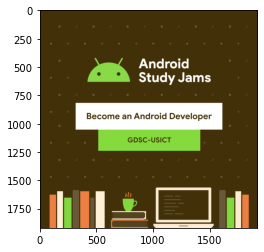

In [5]:
plt.imshow(img)
plt.show()
#CV2 -> RGB is Treated as BGR 

In [6]:
%matplotlib


Using matplotlib backend: MacOSX


In [7]:
cv2.imshow("WindowName",img)
cv2.waitKey(2000)
cv2.destroyAllWindows()

# Converting Color Spaces

In [14]:
imgRgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
imgRgb.shape

(1919, 1917, 3)

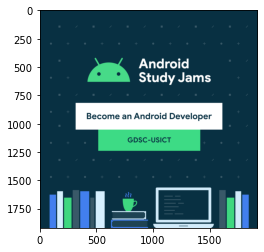

In [15]:
plt.imshow(imgRgb)
plt.show()


In [21]:
imgGray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
imgGray.shape


(1919, 1917)

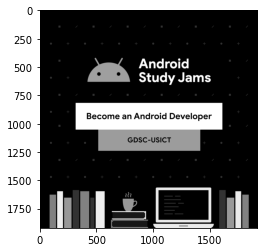

In [24]:
plt.imshow(imgGray,cmap="gray")
plt.show()

## Resizing And Blurring

In [31]:
#Resizing
imgResized=cv2.resize(imgRgb,(1500,500))
imgResized.shape

(500, 1500, 3)

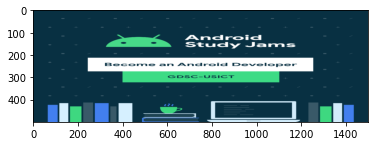

In [32]:
plt.imshow(imgResized)
plt.show()

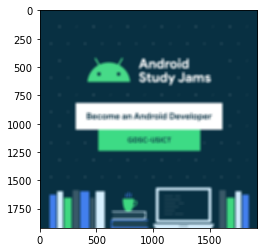

In [37]:
imgBlurred=cv2.blur(imgRgb,(30,30))
#(3,3) k size (kernal size) blur in 3x3 pixels sizes
plt.imshow(imgBlurred)
plt.show()

## Rotating

In [41]:
rows, cols, dimen=imgRgb.shape

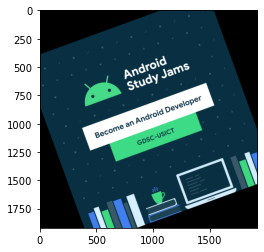

In [44]:
M=cv2.getRotationMatrix2D((rows/2,cols/2),20, 0.9)
#Rotatiing MAtrix
#(center ,degres anticlock, resize ratio)
i = cv2.warpAffine(imgRgb, M, (cols, rows))

plt.imshow(i)

## Translate Images

In [60]:
M=np.float32(([1,0.1,300],[0,1,500]))
# 1-> transalation  0->rotation         50->pixels
# 0-> rotation1     1-> transalation    20->pixels
M

array([[1.e+00, 1.e-01, 3.e+02],
       [0.e+00, 1.e+00, 5.e+02]], dtype=float32)

In [61]:
i=cv2.warpAffine(imgRgb,M,(cols,rows))

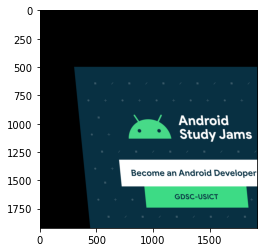

In [62]:
plt.imshow(i)
plt.show()

# Egde Detection - Canny Edge Detection

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


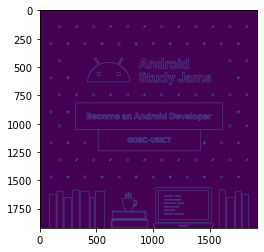

In [74]:
i=cv2.Canny(imgRgb,10,10)
print(i)
plt.imshow(i)
plt.show()

# Get Video From Camera

In [1]:
import cv2


In [4]:
%matplotlib inline

In [3]:
cam=cv2.VideoCapture(0)
# 0-> primary webcam
# 1-> secondary

In [4]:
while True:
    success,frame=cam.read()
    
    if(success==False):
        continue
    cv2.imshow("My Frame", frame)
    
    # waiting for user to press a key
    # if "q" then terminate
    key_pressed = cv2.waitKey(1) & 0xFF
    if key_pressed==ord("q"):
        break

cam.release()
cv2.destroyAllWindows()
    

In [1]:
ord("q")

113

In [49]:
img=plt.imread("./GroupPhoto.jpg")


In [50]:
detector=cv2.CascadeClassifier("./haarcascade_frontalface_default.xml")

In [57]:
all_faces=detector.detectMultiScale(img, 1.2, 10)
all_faces.shape

(5, 4)

In [56]:
img= cv2.rectangle(img, (x,y), (x+w,y+h), (0,0,0),2)

In [53]:
for face in all_faces:
    
    x,y,w,h =face
    img= cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0),40)

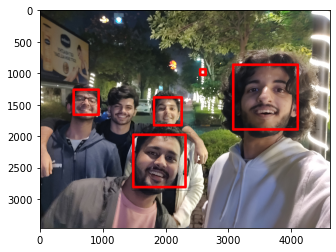

In [54]:
plt.imshow(img)